In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [127]:
df = pd.read_csv('data/train.csv')

In [128]:
df.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,...,3,1,10,2,10,7,7,8,1,1


In [129]:
df.shape

(1628, 29)

### Without Feature Engineering

In [5]:
cols_to_drop = ['Id','Behaviour','Gender','MaritalStatus','Education', 'Department','PerformanceRating']

### With Feature Engineering

In [130]:
df['YearsToCompanies'] = pd.cut((df.TotalWorkingYears / (df.NumCompaniesWorked+1)),[-1,2,4,6,8,np.inf], labels=[1,2,3,4,5]).astype('int64')
df['PropCurrMgrCompYears'] = df.YearsWithCurrManager / (df.YearsAtCompany+1)
df['PropAgeCompYears'] = pd.qcut((df.YearsAtCompany) / (df.Age+1), 5, duplicates='drop', labels=[1,2,3,4,5]).astype('int64')
df['PropTrainCompYears'] = pd.qcut(df.TrainingTimesLastYear / (df.YearsAtCompany+1),4, labels=[1,2,3,4]).astype('int64')
df['PropCurrRoleCompYears'] = df.YearsInCurrentRole / (df.YearsAtCompany+1)

cols_to_drop = ['Id',
                'Behaviour', 
                'Gender',
                'MaritalStatus', 
                'Education', 
                'PerformanceRating',
                'Department',
                'MonthlyIncome',
                'YearsAtCompany',
                'TrainingTimesLastYear', 
                'YearsInCurrentRole', 
                'YearsSinceLastPromotion', 
                'YearsWithCurrManager']
df_cleaned = df.drop(cols_to_drop, axis=1)
len(df_cleaned.columns)

21

In [131]:
df_reduced = df.drop(cols_to_drop, axis=1)
df_reduced.drop_duplicates(inplace=True)
df_reduced.head()

,Age,Attrition,BusinessTravel,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobRole,JobSatisfaction,...,OverTime,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,CommunicationSkill,YearsToCompanies,PropCurrMgrCompYears,PropAgeCompYears,PropTrainCompYears,PropCurrRoleCompYears
0,30,0,Non-Travel,2,Medical,571,3,3,Laboratory Technician,4,...,No,14,0,12,4,5,0.583333,5,1,0.583333
1,36,0,Travel_Rarely,12,Life Sciences,1614,3,3,Manufacturing Director,3,...,Yes,12,2,7,2,1,0.250000,2,2,0.500000
2,55,1,Travel_Rarely,2,Medical,842,3,3,Sales Executive,4,...,No,16,0,12,5,2,0.300000,4,2,0.700000
3,39,0,Travel_Rarely,24,Life Sciences,2014,1,3,Research Scientist,4,...,No,13,0,18,4,2,0.875000,4,1,0.875000
4,37,0,Travel_Rarely,3,Other,689,3,3,Manufacturing Director,3,...,No,15,1,10,1,3,0.727273,4,1,0.636364


In [132]:
df_reduced.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DistanceFromHome',
       'EducationField', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobRole', 'JobSatisfaction', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'StockOptionLevel',
       'TotalWorkingYears', 'CommunicationSkill', 'YearsToCompanies',
       'PropCurrMgrCompYears', 'PropAgeCompYears', 'PropTrainCompYears',
       'PropCurrRoleCompYears'],
      dtype='object')

In [133]:
obj_cols = df_reduced.select_dtypes(include=['object']).columns.tolist()
obj_cols

['BusinessTravel', 'EducationField', 'JobRole', 'OverTime']

In [134]:
y = df_reduced.loc[:,['Attrition']].values.ravel()
df_train = df_reduced.drop(['Attrition'],axis=1)

In [135]:
df_onehot = pd.get_dummies(df_train, drop_first=True, columns=obj_cols)
df_onehot

,Age,DistanceFromHome,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,...,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes
0,30,2,571,3,3,4,0,14,0,12,...,0,0,1,0,0,0,0,0,0,0
1,36,12,1614,3,3,3,9,12,2,7,...,0,0,0,0,1,0,0,0,0,1
2,55,2,842,3,3,4,4,16,0,12,...,0,0,0,0,0,0,0,1,0,0
3,39,24,2014,1,3,4,7,13,0,18,...,0,0,0,0,0,0,1,0,0,0
4,37,3,689,3,3,3,1,15,1,10,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,36,10,592,2,3,4,1,14,0,10,...,0,0,0,0,0,0,0,1,0,0
996,40,16,1641,3,3,4,6,15,0,18,...,0,0,0,0,1,0,0,0,0,1
997,46,9,118,3,2,4,1,16,0,9,...,0,0,0,0,0,0,0,1,0,0
998,30,2,833,3,2,4,5,24,0,12,...,0,0,0,0,1,0,0,0,0,1


In [136]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_train_onehot_scaled = sc.fit_transform(df_onehot)

In [137]:
X = df_train_onehot_scaled

In [138]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [139]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel

### Select From Model Function

In [140]:
def get_support_from_model(model_class, max_features, X_train, y_train):
    sel = SelectFromModel(model_class, max_features=max_features)
    sel.fit(X_train, y_train)
    return sel.get_support()

In [141]:
def get_support_from_rfe(model_class, max_features, X_train, y_train):
    rfe = RFE(model_class, max_features)
    rfe.fit(X_train, y_train)
    return rfe.get_support()

In [142]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LinearRegression, SGDClassifier
from sklearn.svm import SVC

**Select From Model**

In [144]:
set_m_A = set(df_onehot.columns[get_support_from_model(RandomForestClassifier(n_estimators=100), 20, X_train, y_train)])
set_m_A

{'Age',
 'CommunicationSkill',
 'DistanceFromHome',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'OverTime_Yes',
 'PercentSalaryHike',
 'PropAgeCompYears',
 'PropCurrMgrCompYears',
 'PropCurrRoleCompYears',
 'StockOptionLevel',
 'TotalWorkingYears'}

In [145]:
set_m_B = set(df_onehot.columns[get_support_from_model(AdaBoostClassifier(n_estimators=100), 20, X_train, y_train)])
set_m_B

{'Age',
 'EmployeeNumber',
 'OverTime_Yes',
 'PercentSalaryHike',
 'PropCurrMgrCompYears',
 'PropCurrRoleCompYears',
 'TotalWorkingYears'}

In [146]:
set_m_A.intersection(set_m_B)

{'Age',
 'EmployeeNumber',
 'OverTime_Yes',
 'PercentSalaryHike',
 'PropCurrMgrCompYears',
 'PropCurrRoleCompYears',
 'TotalWorkingYears'}

In [147]:
model_set = set_m_A.intersection(set_m_B)

**Select From RFE**

In [148]:
set_r_A = set(df_onehot.columns[get_support_from_rfe(RandomForestClassifier(n_estimators=100), 20, X_train, y_train)])
set_r_A

{'Age',
 'BusinessTravel_Travel_Frequently',
 'CommunicationSkill',
 'DistanceFromHome',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'OverTime_Yes',
 'PercentSalaryHike',
 'PropAgeCompYears',
 'PropCurrMgrCompYears',
 'PropCurrRoleCompYears',
 'PropTrainCompYears',
 'StockOptionLevel',
 'TotalWorkingYears',
 'YearsToCompanies'}

In [149]:
set_r_B = set(df_onehot.columns[get_support_from_rfe(AdaBoostClassifier(n_estimators=100), 20, X_train, y_train)])
set_r_B

{'Age',
 'BusinessTravel_Travel_Frequently',
 'DistanceFromHome',
 'EducationField_Technical Degree',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobRole_Laboratory Technician',
 'JobRole_Sales Executive',
 'JobRole_Sales Representative',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'OverTime_Yes',
 'PercentSalaryHike',
 'PropAgeCompYears',
 'PropCurrMgrCompYears',
 'PropCurrRoleCompYears',
 'PropTrainCompYears',
 'StockOptionLevel',
 'TotalWorkingYears'}

In [150]:
set_r_C = set(df_onehot.columns[get_support_from_rfe(LinearRegression(), 20, X_train, y_train)])
set_r_C

{'Age',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'CommunicationSkill',
 'DistanceFromHome',
 'EducationField_Life Sciences',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobRole_Laboratory Technician',
 'JobRole_Sales Executive',
 'JobRole_Sales Representative',
 'JobSatisfaction',
 'OverTime_Yes',
 'PropAgeCompYears',
 'PropCurrMgrCompYears',
 'PropTrainCompYears',
 'StockOptionLevel',
 'YearsToCompanies'}

In [151]:
set_r_D = set(df_onehot.columns[get_support_from_rfe(SGDClassifier(), 20, X_train, y_train)])
set_r_D

{'Age',
 'BusinessTravel_Travel_Frequently',
 'CommunicationSkill',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'JobRole_Laboratory Technician',
 'JobRole_Manager',
 'JobRole_Manufacturing Director',
 'JobRole_Research Director',
 'JobRole_Research Scientist',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'OverTime_Yes',
 'PropAgeCompYears',
 'PropCurrMgrCompYears',
 'PropCurrRoleCompYears',
 'PropTrainCompYears',
 'StockOptionLevel'}

In [152]:
set_r_A.intersection(set_r_B).intersection(set_r_C).intersection(set_r_D)

{'Age',
 'BusinessTravel_Travel_Frequently',
 'EnvironmentSatisfaction',
 'JobSatisfaction',
 'OverTime_Yes',
 'PropAgeCompYears',
 'PropCurrMgrCompYears',
 'PropTrainCompYears',
 'StockOptionLevel'}

In [153]:
rfe_set = set_r_A.intersection(set_r_B).intersection(set_r_C).intersection(set_r_D)

In [154]:
model_set.intersection(rfe_set)

{'Age', 'OverTime_Yes', 'PropCurrMgrCompYears'}

In [155]:
master_set = set_m_A.union(set_m_B).union(set_r_A).union(set_r_B).union(set_r_C).union(set_r_D)

In [156]:
master_set

{'Age',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'CommunicationSkill',
 'DistanceFromHome',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobRole_Laboratory Technician',
 'JobRole_Manager',
 'JobRole_Manufacturing Director',
 'JobRole_Research Director',
 'JobRole_Research Scientist',
 'JobRole_Sales Executive',
 'JobRole_Sales Representative',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'OverTime_Yes',
 'PercentSalaryHike',
 'PropAgeCompYears',
 'PropCurrMgrCompYears',
 'PropCurrRoleCompYears',
 'PropTrainCompYears',
 'StockOptionLevel',
 'TotalWorkingYears',
 'YearsToCompanies'}

In [157]:
set(df_onehot.columns).difference(master_set)

{'EducationField_Medical', 'JobRole_Human Resources'}

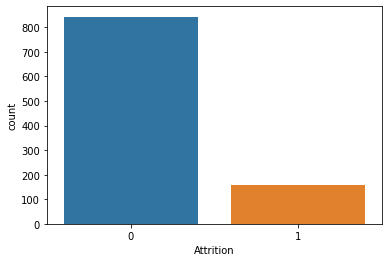

In [158]:
sns.countplot(df_reduced.Attrition)

**Dropping Duplicates lead to HUGE imbalance!**